# Preventable Hospitalizations For Medical Conditions
### Devanshi Pratiher

# Introduction
### Rates of Preventable Hospitalizations (Age<18) for Selected Medical Conditions by County Dataset

I am very passionate about more about preventable healthcare. With my personal experience visiting doctors and hospitals is how I have noticed that they are invested in providing medication to cure a disease but rarely do they talk about ways to prevent different diseases. This dataset contains prevented hospitalizations of patients with diseases if the patient had been provided the right consultation and treatment. A question I would like to answer is: What are the most common diseases where patients can be prevented from hospitalization with high-quality outpatient care?
<br>
This dataset contains prevented hospitalizations of patients with diseases if the patient had been provided the right consultation and treatment. A question I would like to answer is: What are the most common diseases where patients can be prevented from hospitalization with high-quality outpatient care?

# Data
### Data source - citation or link to the source
Data source: Include the citation for your data, and provide a link to the source. <br>
Citation: California Department of Health Care Access and Information. (2022). Rates of Preventable Hospitalizations (Age<18) for Selected Medical Conditions by County [Data Set]. https://data.ca.gov/dataset/rates-of-preventable-hospitalizations-age18-for-selected-medical-conditions-by-county/resource/73f0a60b-92e3-4cff-8af6-99477015fabf?inner_span=True  <br> <br>

### Data collection: how/ when was data collected? Is it observational study or from an experiment?
The data was collected by the Office of Statewide Health Planning and Development (OSHPD). OSHPD helps collect data from hospitals and licensed healthcare facilities. The HCAI, where this dataset is from, produces datasets and data products from a variety of sources including the OSHPD where this data was collected from. 

### Units of observations: What is the unit of observation, in most cases it would mean what each row indicates?
The cases of this dataset are the patients and the county. The rows represent the location and the type of disease that could have been prevented in various parts of California in terms of the count and the reason for the hospitalization. 

### Variables: What are the variables that you are planning to study ? All or a subset of variables?
The variables are: <br>
Year: Year of inpatient discharge.<br>
County: County in which the patient resided.<br>
PDI: Pediatric Quality Indicator Code.<br>
PDIDescription: Pediatric Quality Indicator Description.<br>
Count_ICD9: Count of hospitalizations with selected medical conditions. Counts less than 11 are not displayed. Years displayed: 2005-2015.<br>
Population_ICD9: Population at risk. The Population is not displayed for Counts > 0 and < 11. For PDI #17-Perforated Appendix, the Population is the number of appendicitis cases. For PQI #9-Low Birth Weight, the Population is the number of newborns. Years displayed: 2005-2015.<br>
ObsRate_ICD9: Observed rate per 100,000 population (count/population x 100,000). Years displayed: 2005-2015<br>
RiskAdjRate_ICD9: Risk-adjusted rate per 100,000 population. Years displayed: 2005-2015. The risk-adjusted rate is the rate the state/county would have if it had an age-sex case-mix like the Reference population (i.e. 2012 State Inpatient Database (numerator), 2012 U.S. Census population (denominator)).<br>
Count_ICD10	Number: Count of hospitalizations with selected medical conditions. Counts < 11 are not displayed.Years displayed: >2016<br>
Population_ICD10: Population at risk. The Population is not displayed for Counts >0 and <11. Years displayed: >2016.<br>


* Risk Adjusted: A statistical process that takes into account the underlying health status and health spending of the enrollees in an insurance plan when looking at their health care outcomes or health care costs.

### Data cleanup (optional): If you had to do any data clean up please include code and brief description of steps, e.g. handling missing observations, transforming variables, filtering on rows, removing outliers.



##  Data Cleanup

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
# library
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
data = pd.read_csv("prevent_hospitalization.csv",encoding= 'unicode_escape',thousands=',')

In [3]:
df = data.copy(deep=True)

In [4]:
df.head()

,Year,County,PDI,PDIDescription,Count_ICD9,Population_ICD9,ObsRate_ICD9,RiskAdjRate_ICD9,Count_ICD10,Population_ICD10,ObsRate_ICD10,RiskAdjRate_ICD10,AnnotationCode,AnnotationDesc
0,2005,_STATEWIDE,9,Low Birth Weight (<2500 grams),30022.0,"542,079",55.4,55.4,NaN,NaN,NaN,NaN,NaN,NaN
1,2006,_STATEWIDE,9,Low Birth Weight (<2500 grams),30722.0,"554,385",55.4,55.4,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,_STATEWIDE,9,Low Birth Weight (<2500 grams),30919.0,"558,242",55.4,55.4,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,_STATEWIDE,9,Low Birth Weight (<2500 grams),30066.0,"542,796",55.4,55.4,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,_STATEWIDE,9,Low Birth Weight (<2500 grams),29062.0,"518,146",56.1,56.1,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dtypes

Year                   int64
County                object
PDI                    int64
PDIDescription        object
Count_ICD9           float64
Population_ICD9       object
ObsRate_ICD9         float64
RiskAdjRate_ICD9     float64
Count_ICD10          float64
Population_ICD10     float64
ObsRate_ICD10        float64
RiskAdjRate_ICD10    float64
AnnotationCode       float64
AnnotationDesc        object
dtype: object

In [6]:
df.describe()

,Year,PDI,Count_ICD9,ObsRate_ICD9,RiskAdjRate_ICD9,Count_ICD10,Population_ICD10,ObsRate_ICD10,RiskAdjRate_ICD10,AnnotationCode
count,7928.000000,7928.000000,4068.000000,5835.000000,5804.000000,1268.000000,1.268000e+03,2065.000000,2065.000000,797.0
mean,2012.083754,42.172553,358.315634,88.690574,86.687078,143.376972,3.777217e+05,34.397821,33.143874,1.0
std,4.499644,36.468774,1738.197902,103.546753,97.233093,522.528892,1.197324e+06,34.824722,33.808278,0.0
min,2005.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.440000e+02,0.000000,0.000000,1.0
25%,2008.000000,15.000000,18.000000,31.200000,30.800000,11.000000,1.676700e+04,10.800000,11.100000,1.0
50%,2012.000000,17.000000,48.000000,54.900000,54.800000,27.500000,7.998200e+04,25.300000,24.300000,1.0
75%,2016.000000,90.000000,150.250000,99.300000,98.000000,75.250000,2.449310e+05,47.900000,45.600000,1.0
max,2020.000000,92.000000,30919.000000,1000.000000,864.300000,6595.000000,8.964200e+06,298.000000,307.600000,1.0


### Accounting for Missing Values

As part of data quality check, we will perform following check and subsitution

- Duplicate , missing values check, check data format and convert data when required into desired data type.
- Replace NaN values with 0 when appropriate.

In [7]:
df2 = df.copy(deep=True)

In [8]:
print(df2.isnull().sum())

Year                    0
County                  0
PDI                     0
PDIDescription          0
Count_ICD9           3860
Population_ICD9      3860
ObsRate_ICD9         2093
RiskAdjRate_ICD9     2124
Count_ICD10          6660
Population_ICD10     6660
ObsRate_ICD10        5863
RiskAdjRate_ICD10    5863
AnnotationCode       7131
AnnotationDesc       7131
dtype: int64


Since the feature AnnotationCode and AnnotationDesc has 7131 values missing out of 7928 values, which is 89.95% of missing values, there is too much missing data and has too little to understand how this feature will be aplicable to the results. Therefore, I will drop these two column.

In [9]:
df2 = df2.drop(columns = ['AnnotationCode', 'AnnotationDesc'])

Both the features Count_ICD10 and Population_ICD10 have a lot of missing values (6660), but as per as the Data Description, we do not need these two collumns since the rest of the columns have data until 2015. These 2 columns have data from 2016 which is not needed for our calculations. Thus, we can drop these columns. 

In [10]:
df2 = df2.drop(columns = ['Count_ICD10', 'Population_ICD10'])

In [11]:
print(df2.isnull().sum())

Year                    0
County                  0
PDI                     0
PDIDescription          0
Count_ICD9           3860
Population_ICD9      3860
ObsRate_ICD9         2093
RiskAdjRate_ICD9     2124
ObsRate_ICD10        5863
RiskAdjRate_ICD10    5863
dtype: int64


In [12]:
df2 = df2.drop(columns = ['ObsRate_ICD10', 'RiskAdjRate_ICD10'])

Both the features ObsRate_ICD10 and RiskAdjRate_ICD10 have a lot of missing values (5863), but as per as the Data Description, we do not need these two collumns since the rest of the columns have data until 2015. These 2 columns have data from 2016 which is not needed for our calculations. Thus, we can drop these columns. 

As per the Data Description, the count of Count_ICD9 and Population_ICD9 that are less than 11 are not displayed. Thus, we can change the missing values to 0.

In [13]:
df2['Count_ICD9'] = df2['Count_ICD9'].fillna(0)
df2['Population_ICD9'] = df2['Population_ICD9'].fillna(0)

In [14]:
print(df2.isnull().sum())

Year                   0
County                 0
PDI                    0
PDIDescription         0
Count_ICD9             0
Population_ICD9        0
ObsRate_ICD9        2093
RiskAdjRate_ICD9    2124
dtype: int64


In [15]:
df2.replace(',','', regex=True, inplace=True)


In [16]:
df2.head()

,Year,County,PDI,PDIDescription,Count_ICD9,Population_ICD9,ObsRate_ICD9,RiskAdjRate_ICD9
0,2005,_STATEWIDE,9,Low Birth Weight (<2500 grams),30022.0,542079,55.4,55.4
1,2006,_STATEWIDE,9,Low Birth Weight (<2500 grams),30722.0,554385,55.4,55.4
2,2007,_STATEWIDE,9,Low Birth Weight (<2500 grams),30919.0,558242,55.4,55.4
3,2008,_STATEWIDE,9,Low Birth Weight (<2500 grams),30066.0,542796,55.4,55.4
4,2009,_STATEWIDE,9,Low Birth Weight (<2500 grams),29062.0,518146,56.1,56.1


In [17]:
df2.dtypes

Year                  int64
County               object
PDI                   int64
PDIDescription       object
Count_ICD9          float64
Population_ICD9      object
ObsRate_ICD9        float64
RiskAdjRate_ICD9    float64
dtype: object

In [18]:
df2['Population_ICD9'] = df2['Population_ICD9'].replace('<11','0')
df2['Population_ICD9'] = pd.to_numeric(df2['Population_ICD9'])

In [19]:
df2['County']= df2['County'].astype("category")
df2['PDIDescription']= df2['PDIDescription'].astype("category")

In [20]:
df2.dtypes

Year                   int64
County              category
PDI                    int64
PDIDescription      category
Count_ICD9           float64
Population_ICD9        int64
ObsRate_ICD9         float64
RiskAdjRate_ICD9     float64
dtype: object

In [21]:
print(df2.describe())

              Year          PDI    Count_ICD9  Population_ICD9  ObsRate_ICD9  \
count  7928.000000  7928.000000   7928.000000     7.928000e+03   5835.000000   
mean   2012.083754    42.172553    183.858224     1.388354e+05     88.690574   
std       4.499644    36.468774   1257.852892     7.457544e+05    103.546753   
min    2005.000000     9.000000      0.000000     0.000000e+00      0.000000   
25%    2008.000000    15.000000      0.000000     0.000000e+00     31.200000   
50%    2012.000000    17.000000      0.000000     5.400000e+01     54.900000   
75%    2016.000000    90.000000     50.250000     4.337850e+04     99.300000   
max    2020.000000    92.000000  30919.000000     9.252424e+06   1000.000000   

       RiskAdjRate_ICD9  
count       5804.000000  
mean          86.687078  
std           97.233093  
min            0.000000  
25%           30.800000  
50%           54.800000  
75%           98.000000  
max          864.300000  


In [22]:
df2.shape

(7928, 8)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7928 entries, 0 to 7927
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Year              7928 non-null   int64   
 1   County            7928 non-null   category
 2   PDI               7928 non-null   int64   
 3   PDIDescription    7928 non-null   category
 4   Count_ICD9        7928 non-null   float64 
 5   Population_ICD9   7928 non-null   int64   
 6   ObsRate_ICD9      5835 non-null   float64 
 7   RiskAdjRate_ICD9  5804 non-null   float64 
dtypes: category(2), float64(3), int64(3)
memory usage: 390.1 KB


Since the number of rows currently is 7928-2124=5804, and we still have 73.21% of the data, this is fine and we can proceed.

Now, we replace the NaN values of the features ObsRate_ICD9, RiskAdjRate_ICD9 with their respective mean.

In [24]:
mean_obsRate = df2['ObsRate_ICD9'].mean()
print(mean_obsRate)

88.69057412167952


In [25]:
mean_RiskAdj = df2['RiskAdjRate_ICD9'].mean()
print(mean_RiskAdj)

86.68707787732615


In [26]:
df2['ObsRate_ICD9'].fillna(value = mean_obsRate, inplace=True)
df2['RiskAdjRate_ICD9'].fillna(value = mean_RiskAdj, inplace=True)

In [27]:
print(df2.isnull().sum())

Year                0
County              0
PDI                 0
PDIDescription      0
Count_ICD9          0
Population_ICD9     0
ObsRate_ICD9        0
RiskAdjRate_ICD9    0
dtype: int64


In [28]:
print(df2.describe())

              Year          PDI    Count_ICD9  Population_ICD9  ObsRate_ICD9  \
count  7928.000000  7928.000000   7928.000000     7.928000e+03   7928.000000   
mean   2012.083754    42.172553    183.858224     1.388354e+05     88.690574   
std       4.499644    36.468774   1257.852892     7.457544e+05     88.831146   
min    2005.000000     9.000000      0.000000     0.000000e+00      0.000000   
25%    2008.000000    15.000000      0.000000     0.000000e+00     40.200000   
50%    2012.000000    17.000000      0.000000     5.400000e+01     81.200000   
75%    2016.000000    90.000000     50.250000     4.337850e+04     88.690574   
max    2020.000000    92.000000  30919.000000     9.252424e+06   1000.000000   

       RiskAdjRate_ICD9  
count       7928.000000  
mean          86.687078  
std           83.192841  
min            0.000000  
25%           39.775000  
50%           81.300000  
75%           86.687078  
max          864.300000  


### Check for Duplicates

In [29]:
df2.duplicated().sum() 

0

# Exploratory Data Analysis + Visualizations

In [30]:
PDI_list =list(df2["PDIDescription"].unique())
PDI_list.sort()
print(PDI_list)

['Asthma (Age 2-17)', 'Diabetes Short-term Complications (Age 6-17)', 'Gastroenteritis (Age 3 months-17 years)', 'Low Birth Weight (<2500 grams)', 'PDI Acute Composite (Age 6-17)', 'PDI Chronic Composite (Age 6-17)', 'PDI Overall Composite (Age 6-17)', 'Perforated Appendix (Age 1-17)', 'Urinary Tract Infection (Age 3 months-17 years)']


### What are the rates of hospitalizations with selected medical conditions?

In [31]:
count_PDI= df2.groupby("PDIDescription")["Count_ICD9"].mean()
count_PDI_max = count_PDI.sort_values(ascending=False)
count_PDI_max 

PDIDescription
Low Birth Weight (<2500 grams)                     951.346970
PDI Overall Composite (Age 6-17)                   178.131356
Asthma (Age 2-17)                                  174.994703
Gastroenteritis (Age 3 months-17 years)            157.450212
Perforated Appendix (Age 1-17)                     135.424242
PDI Chronic Composite (Age 6-17)                   115.434322
Urinary Tract Infection (Age 3 months-17 years)     66.121822
PDI Acute Composite (Age 6-17)                      61.273305
Diabetes Short-term Complications (Age 6-17)        30.872881
Name: Count_ICD9, dtype: float64

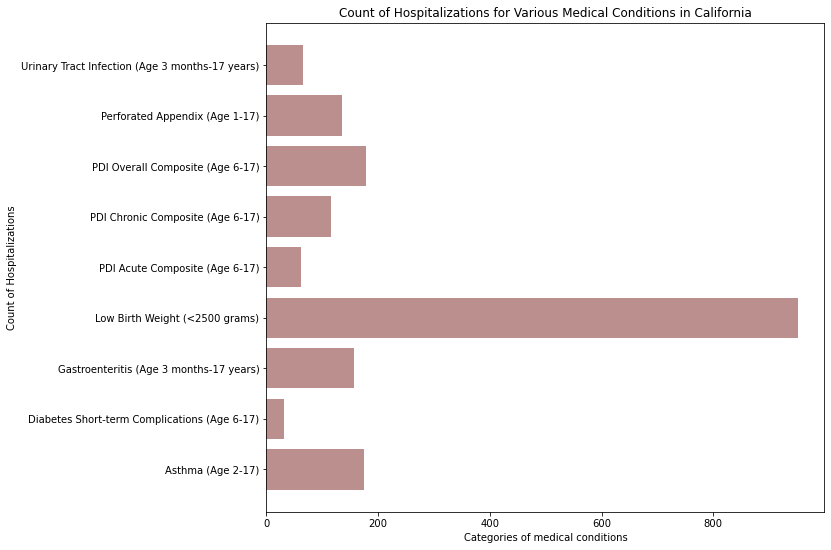

In [153]:
fig = plt.figure(figsize = (10, 9))
plt.barh(PDI_list, count_PDI, color ='rosybrown')

plt.xlabel("Categories of medical conditions")
plt.ylabel("Count of Hospitalizations")
plt.title("Count of Hospitalizations for Various Medical Conditions in California")
plt.show()

As we clearly see, Low Birth Weight far exceeds any of the other medical conditions. However, this category is not something that can be preventable. We look at the other features that can be preventable for this dataset: Diabetes and Gastroenteritis.

### What is the risk-adjusted rate of medical conditions pertaining to each category of the condition? 

In [33]:
risk_PDI= df2.groupby("PDIDescription")["RiskAdjRate_ICD9"].mean()
risk_PDI_max = risk_PDI.sort_values(ascending=False)
risk_PDI_max

PDIDescription
Perforated Appendix (Age 1-17)                     292.771137
PDI Overall Composite (Age 6-17)                   107.005072
PDI Chronic Composite (Age 6-17)                    77.983462
Asthma (Age 2-17)                                   77.414182
Gastroenteritis (Age 3 months-17 years)             74.027847
PDI Acute Composite (Age 6-17)                      56.031449
Low Birth Weight (<2500 grams)                      53.283162
Urinary Tract Infection (Age 3 months-17 years)     47.266725
Diabetes Short-term Complications (Age 6-17)        46.351047
Name: RiskAdjRate_ICD9, dtype: float64

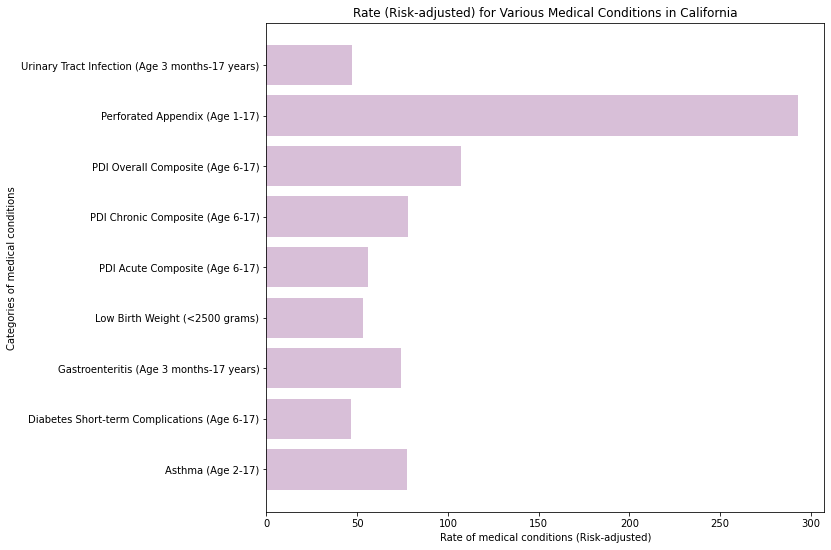

In [266]:
fig = plt.figure(figsize = (10, 9))
plt.barh(PDI_list, risk_PDI, color ='thistle')

plt.xlabel("Rate of medical conditions (Risk-adjusted)")
plt.ylabel("Categories of medical conditions")
plt.title("Rate (Risk-adjusted) for Various Medical Conditions in California")
plt.show()

Based on the graph above, we see that Perforated Appendix (Age 1-17) is one of the categories of medical conditions with the highest rate in California.

### What are the counties' rates of medical conditions (Risk-adjusted)?

In [35]:
county_list =list(df2["County"].unique())
county_list.sort()
print(county_list)

['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa', 'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito', 'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Unassigned', 'Ventura', 'Yolo', 'Yuba', '_STATEWIDE']


In [36]:
county_PDI= df2.groupby("County")["RiskAdjRate_ICD9"].mean()
county_PDI_max = county_PDI.sort_values(ascending=False)
county_PDI_max

County
Unassigned         205.627273
Imperial           149.509311
Shasta             113.032446
Alameda            111.873490
Fresno             108.977968
Del Norte          108.387670
Tehama             107.130953
Lake               106.800356
San Bernardino     103.699610
Lassen             102.217424
Madera              99.151849
Los Angeles         98.968267
Sutter              96.737670
Colusa              94.446625
Stanislaus          94.074237
San Joaquin         93.567520
Tulare              92.722744
Sacramento          92.356326
Butte               92.310058
Merced              92.260804
_STATEWIDE          91.926476
Yuba                91.765282
Kings               91.513789
Siskiyou            91.460058
Contra Costa        90.081699
Mono                89.888487
Riverside           88.976476
San Francisco       88.654088
Monterey            88.361550
Kern                87.277222
San Diego           86.742147
Mendocino           86.400356
Nevada              85.924237
Gle

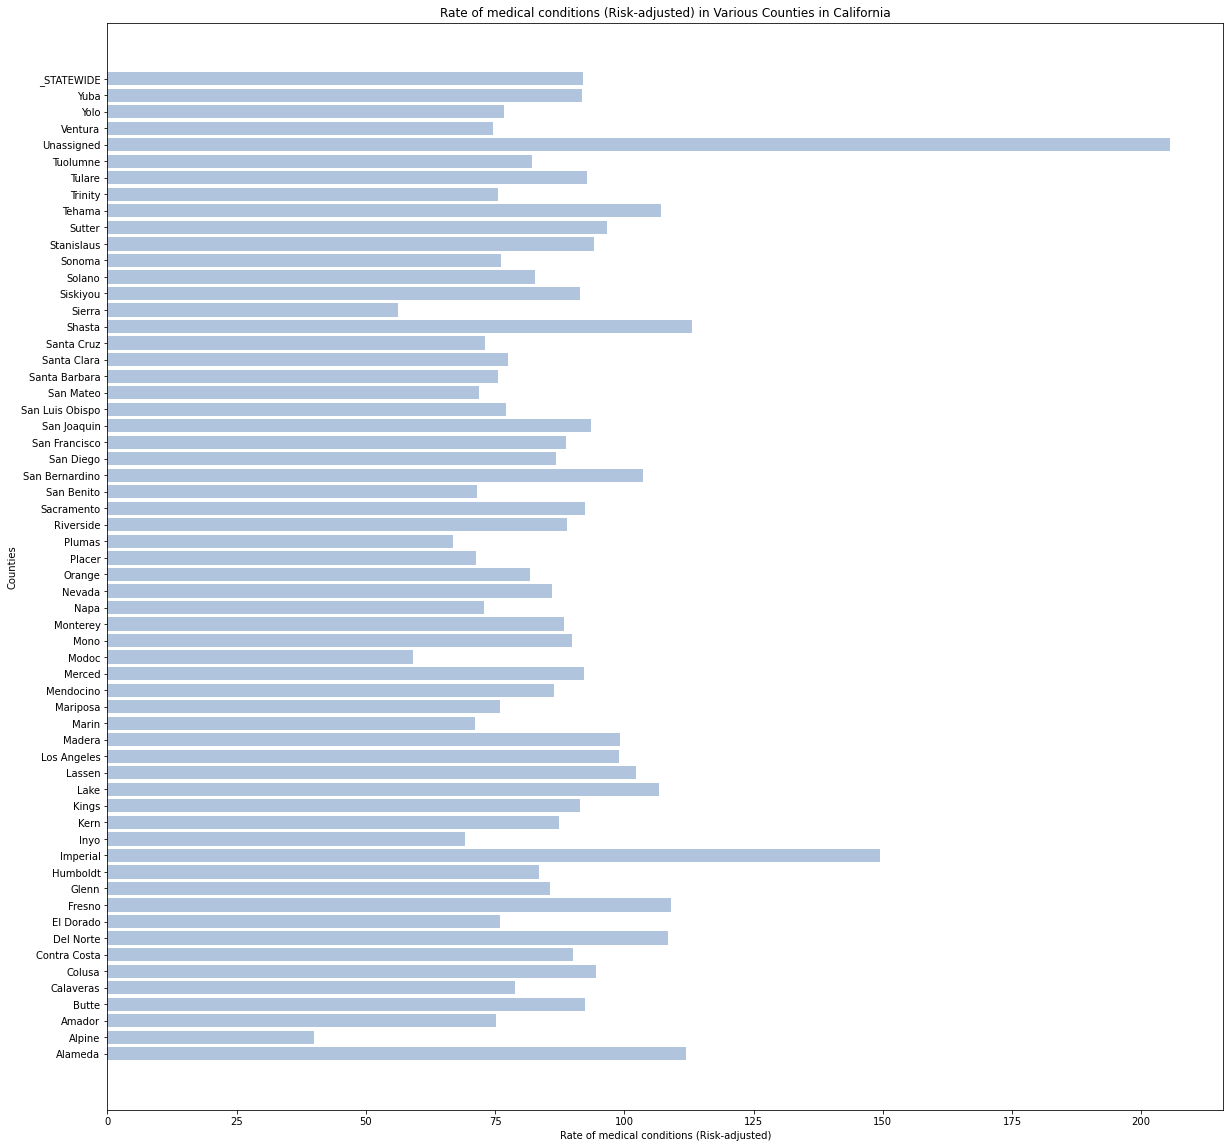

In [188]:
fig = plt.figure(figsize = (20, 20))
plt.barh(county_list, county_PDI, color ='lightsteelblue')

plt.xlabel("Rate of medical conditions (Risk-adjusted)")
plt.ylabel("Counties")
plt.title("Rate of medical conditions (Risk-adjusted) in Various Counties in California")
plt.show()

Here, we see the rates of different medical conditions in each county in California. Imperial and Shasta are the top two counties with the highest rates reported (risk-adjusted).

### What is the Population at risk in different counties in CA?


In [122]:
county_pop = df2[['County', 'Population_ICD9']]

In [125]:
county_pop = county_pop[county_pop.County != '_STATEWIDE']
county_pop 

,County,Population_ICD9
134,Alameda,20963
135,Alameda,21158
136,Alameda,21569
137,Alameda,20994
138,Alameda,20351
...,...,...
7923,Yuba,0
7924,Yuba,0
7925,Yuba,0
7926,Yuba,0


In [127]:
county_pop_group = county_pop .groupby("County")["Population_ICD9"].mean()

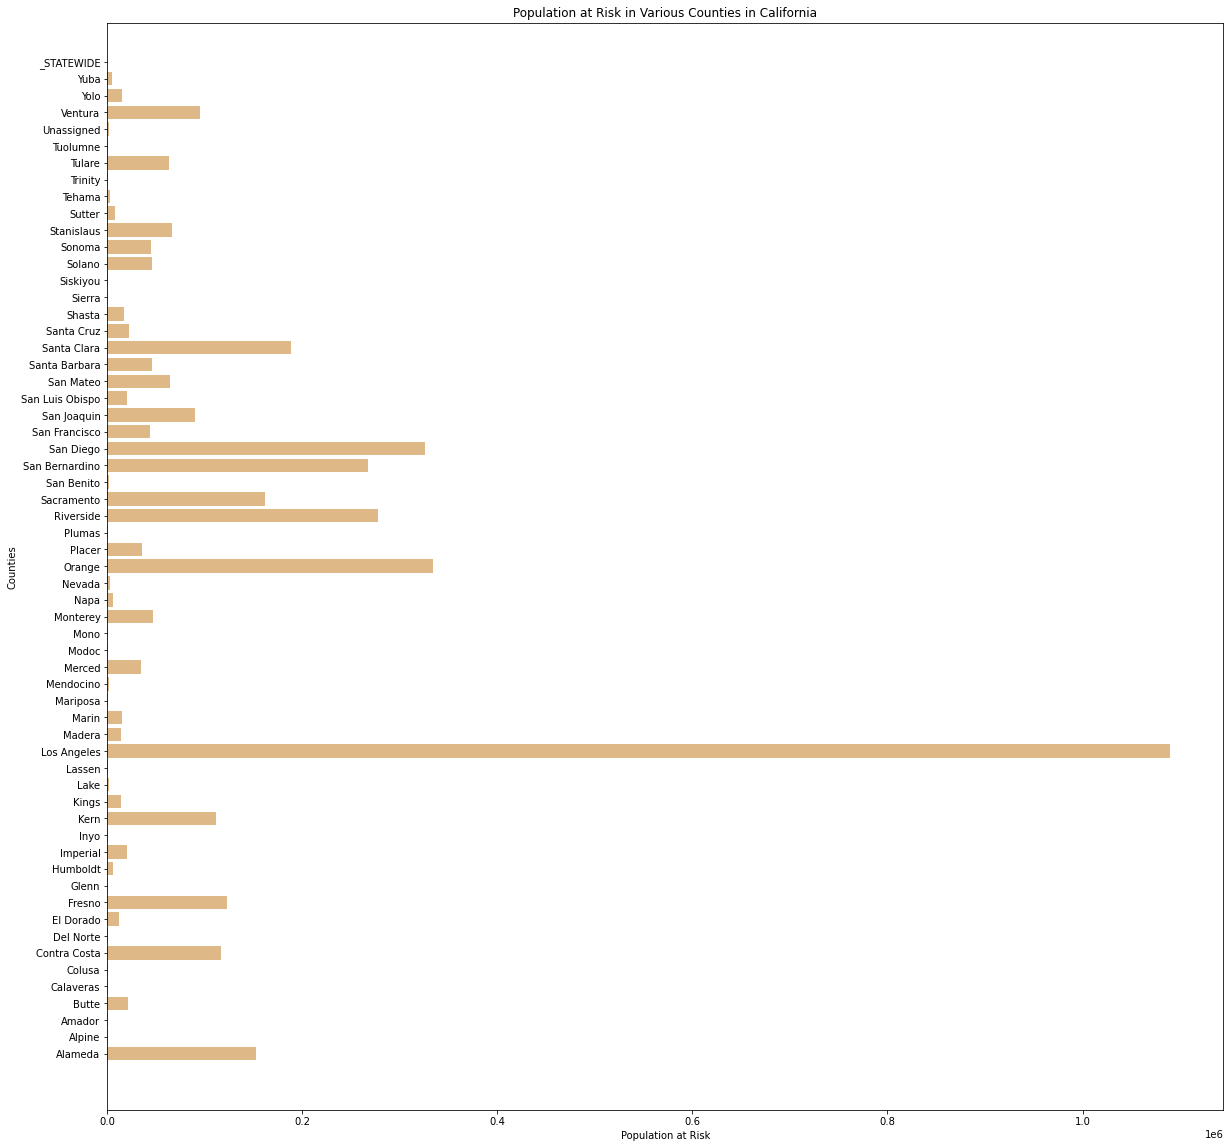

In [189]:
fig = plt.figure(figsize = (20, 20))
plt.barh(county_list, county_pop_group, color ='burlywood')

plt.xlabel("Population at Risk")
plt.ylabel("Counties")
plt.title("Population at Risk in Various Counties in California")
plt.show()

The graph shows how various counties in CA that have different rates of population at risk for the medical conditions with LA being one of the highest.

### Correlation Statistics

In [143]:
df2.corr()

,Year,PDI,Count_ICD9,Population_ICD9,ObsRate_ICD9,RiskAdjRate_ICD9
Year,1.000000,0.074008,-0.078452,-0.092670,-0.014468,-0.018068
PDI,0.074008,1.000000,-0.048475,0.003908,-0.050457,-0.045905
Count_ICD9,-0.078452,-0.048475,1.000000,0.410198,0.003578,0.005577
Population_ICD9,-0.092670,0.003908,0.410198,1.000000,-0.043545,-0.044498
ObsRate_ICD9,-0.014468,-0.050457,0.003578,-0.043545,1.000000,0.937850
RiskAdjRate_ICD9,-0.018068,-0.045905,0.005577,-0.044498,0.937850,1.000000


### Accounting for Outliers

/var/folders/t2/wwjy7ymd5fx3f6g0d72b_yn00000gn/T/ipykernel_15965/757105810.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df2.hist(ax = ax, color='powderblue', grid=False)


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'PDI'}>],
       [<AxesSubplot:title={'center':'Count_ICD9'}>,
        <AxesSubplot:title={'center':'Population_ICD9'}>],
       [<AxesSubplot:title={'center':'ObsRate_ICD9'}>,
        <AxesSubplot:title={'center':'RiskAdjRate_ICD9'}>]], dtype=object)

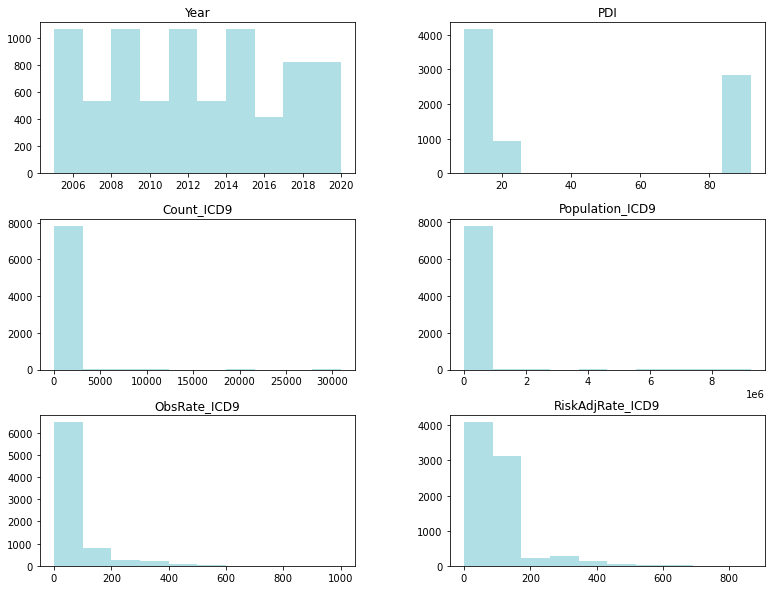

In [181]:
fig = plt.figure(figsize = (13,10))
ax = fig.gca()
df2.hist(ax = ax, color='powderblue', grid=False)

### Develop 2-3 Quesions you want answered.
1. How does PDI correspond with Observed Rate in terms of how the quality indiacator affects hospitalizations?
2. Does the count of hospitalizations change with PDI per county?
3. How does Risk Adjusted Rate change with different areas of symtoms (Low Birth, etc.)?

# Data Analysis

## Hypothesis Testing

### 1. Is the Rate of Medical Condition, specifically Perforated Appendix in the United States greater than that of the average in California? As found in the National Library of Medicine: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7599446/

In [43]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [44]:
df3 = df2[( df2['PDIDescription'] == 'Perforated Appendix (Age 1-17)')]
df3.head()

,Year,County,PDI,PDIDescription,Count_ICD9,Population_ICD9,ObsRate_ICD9,RiskAdjRate_ICD9
59,2005,_STATEWIDE,17,Perforated Appendix (Age 1-17),4181.0,12521,333.9,328.6
60,2006,_STATEWIDE,17,Perforated Appendix (Age 1-17),4067.0,12574,323.4,320.2
61,2007,_STATEWIDE,17,Perforated Appendix (Age 1-17),4064.0,12905,314.9,312.2
62,2008,_STATEWIDE,17,Perforated Appendix (Age 1-17),4294.0,13574,316.3,314.2
63,2009,_STATEWIDE,17,Perforated Appendix (Age 1-17),4162.0,13817,301.2,298.2


In [45]:
r_sample=df3.sample(n = 30, replace = False, random_state=10)

In [46]:
r_sample.head()

,Year,County,PDI,PDIDescription,Count_ICD9,Population_ICD9,ObsRate_ICD9,RiskAdjRate_ICD9
3142,2006,Mendocino,17,Perforated Appendix (Age 1-17),0.0,0,291.7,302.600000
4221,2013,Placer,17,Perforated Appendix (Age 1-17),21.0,74,283.8,309.600000
3552,2014,Mono,17,Perforated Appendix (Age 1-17),0.0,0,500.0,86.687078
463,2007,Amador,17,Perforated Appendix (Age 1-17),0.0,0,111.1,105.400000
4618,2008,Sacramento,17,Perforated Appendix (Age 1-17),106.0,409,259.2,268.300000


The mean population is the mean rate of perforated appendix cases in the United States under the age of 18 which is 457.7 per 1000 cases in 2015. <br>
The mean sample is the mean rate of perforated appendix cases under the age of 18 in California.

#### Null Hypothesis:
     Ho: sample_mean = popul_mean

#### Alternative Hypothesis:
     H1: sample_mean < popul_mean

#### Test statistic: t test
Randomly selecting 30 rows from the dataset. <br>
One-Sided t-test: <br>
t=(mean_s-mean_pop)/(s/sqrt(n)) <br>
s - standard deviation <br>
n - number of rows <br>

In [47]:
n=len(r_sample)

In [48]:
n

30

In [49]:
from scipy import stats
from scipy.stats import ttest_1samp

In [50]:
popul_mean = 457.7
sample_mean = round(r_sample['RiskAdjRate_ICD9'].mean(),2)

In [51]:
sample_mean

268.31

In [55]:
std_error = np.std(r_sample['RiskAdjRate_ICD9']) / np.sqrt(n)

In [56]:
std_error

23.524634277382773

In [57]:
from scipy.stats import ttest_1samp
import numpy as np

In [58]:
t = (sample_mean - popul_mean) / std_error
t

-8.050709641938395

#### Rejection criteria:
Reject Ho if p-value <= alpha, where alpha = 0.05. <br>
OR <br>
Reject Ho if test statistic (t value) <= critical value.

In [64]:
t_abs= abs(t) 
t_abs

8.050709641938395

In [65]:
import scipy.stats
  
# To find the T critical value
pval=1-scipy.stats.t.cdf(t_abs,df=n-1)
pval

3.5244529517086676e-09

In [71]:
critical_value = round(scipy.stats.t.ppf(q=0.05,df=n-1),2)
cvalue = abs(critical_value)
cvalue

1.7

In [72]:
if pval < 0.05 and t < cvalue:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


### Conclusion
According to the conclusions drawn from the One-Sided T-Test, with the 95% cofidence interval, we can say that the mean (Risk Adjusted) rates of Perforated Appendix (Age 1-17)	in California is in fact less than the average rates of Perforated Appendix (Age 1-17) for others in the United States. We reject the null hypothesis. Based on this, we can tell that the mean perforated Appendix rates are not higher than the national average. 

### 2. How does the mean "Count_ICD9" compare to all the other means the counties of California? The "Count_ICD9" is the count of hospitalizations with selected medical conditions.

In [129]:
sample_df = df2[['County', 'Count_ICD9']]
sample_df = sample_df[sample_df.County != '_STATEWIDE']

sample_df.head()

,County,Count_ICD9
134,Alameda,1313.0
135,Alameda,1318.0
136,Alameda,1270.0
137,Alameda,1272.0
138,Alameda,1251.0


In [130]:
groups = sample_df.groupby('County').mean().reset_index()
groups.head()

,County,Count_ICD9
0,Alameda,253.843284
1,Alpine,0.000000
2,Amador,0.932836
3,Butte,28.313433
4,Calaveras,1.186567


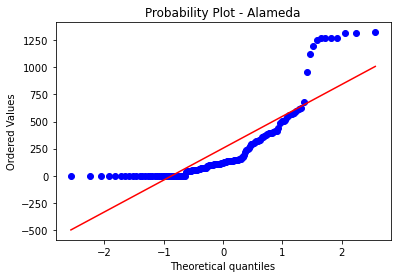

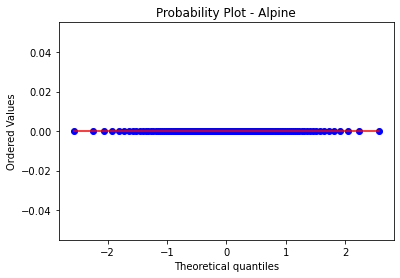

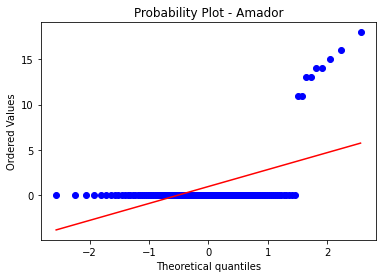

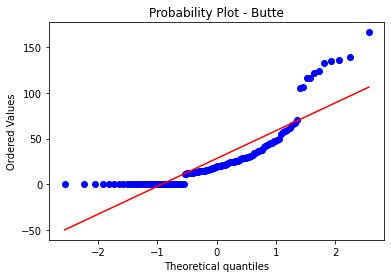

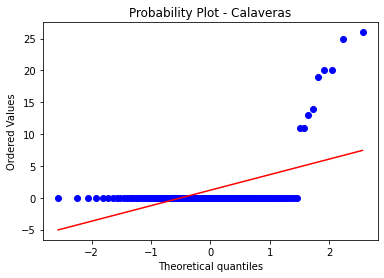

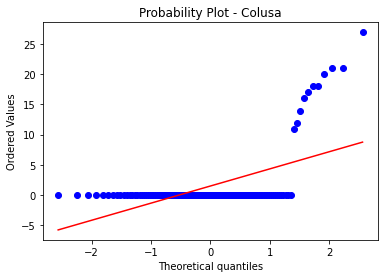

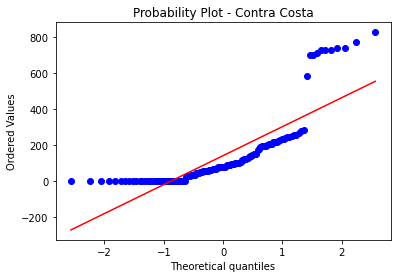

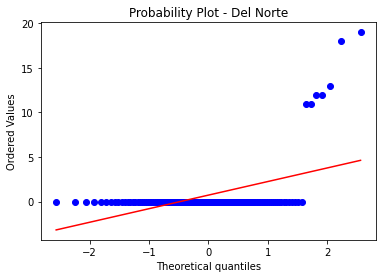

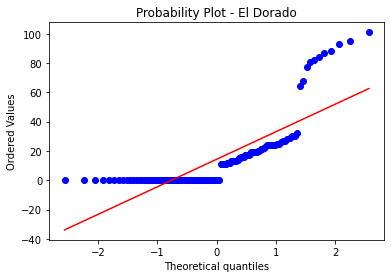

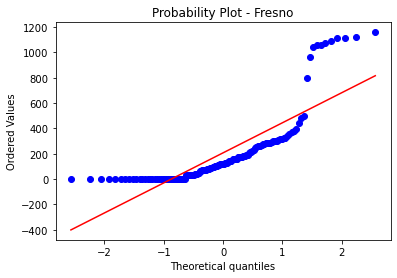

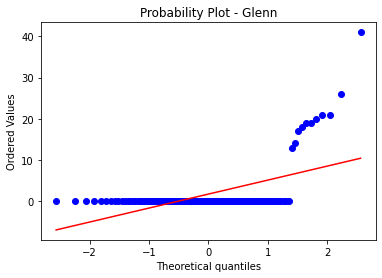

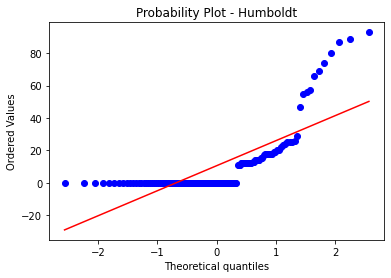

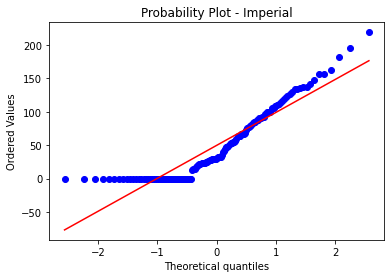

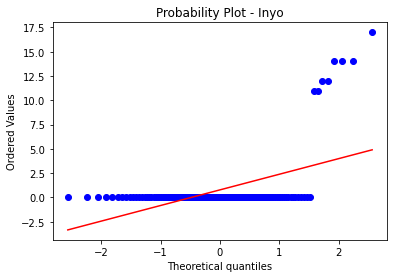

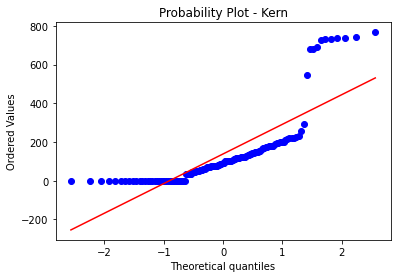

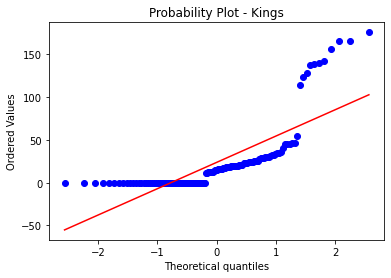

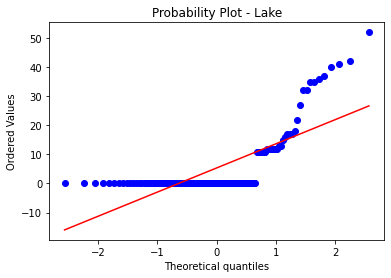

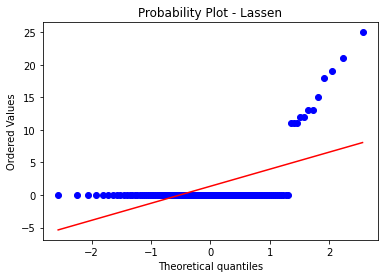

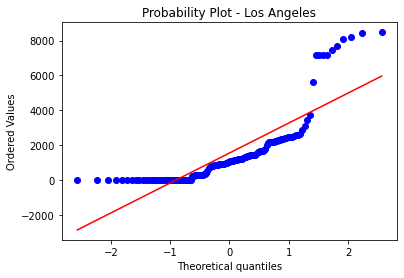

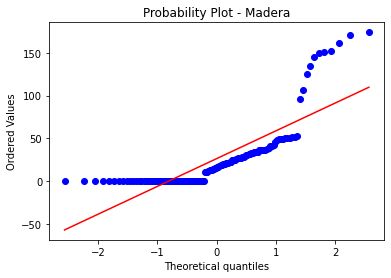

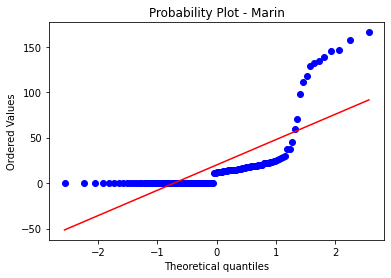

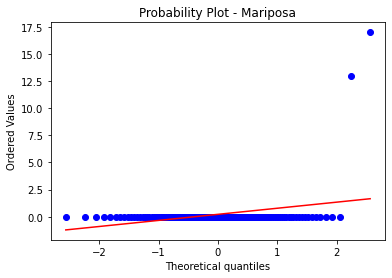

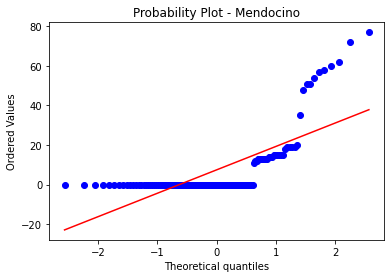

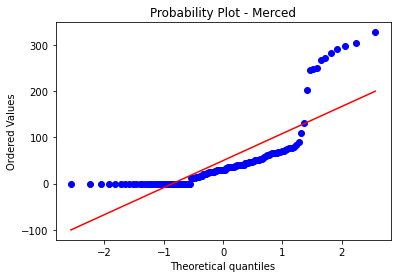

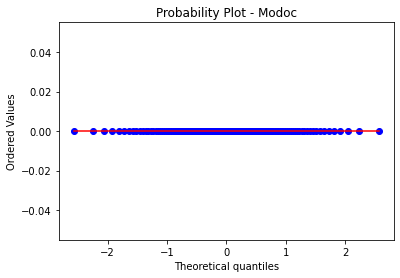

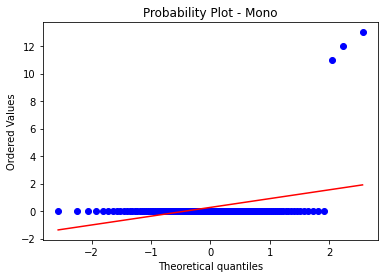

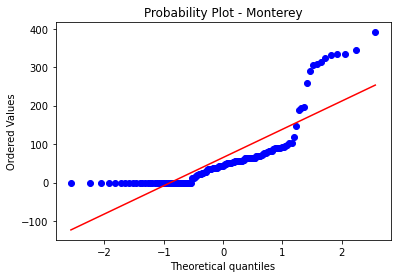

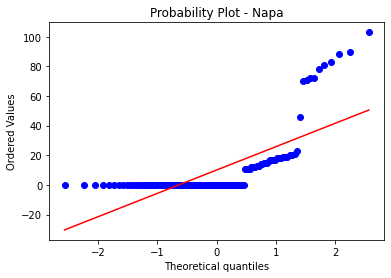

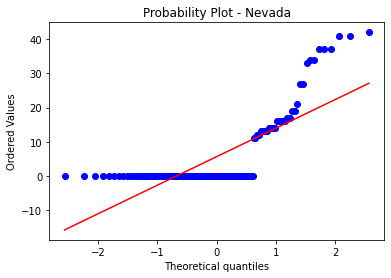

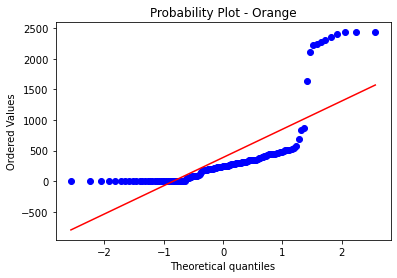

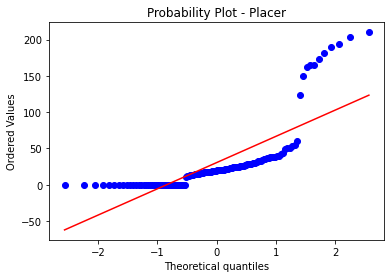

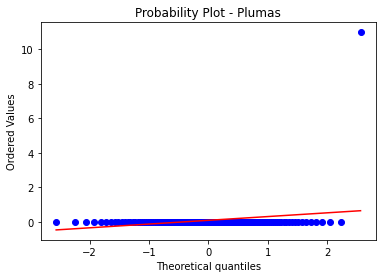

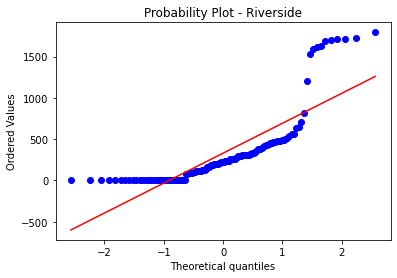

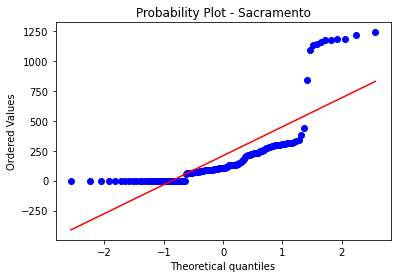

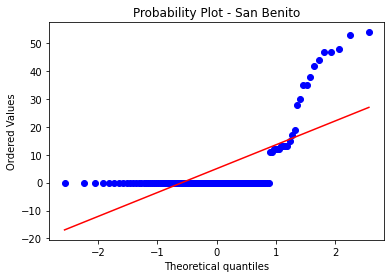

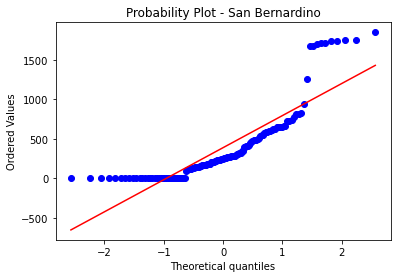

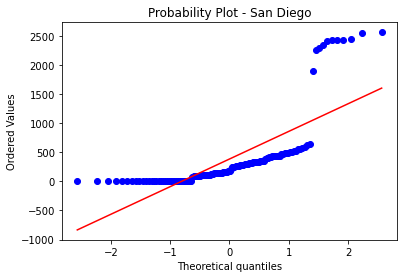

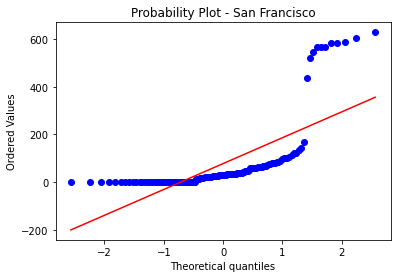

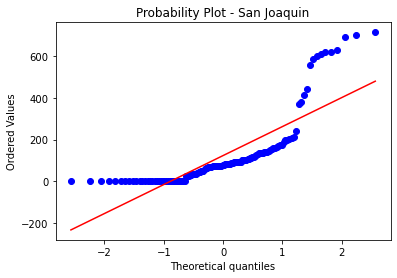

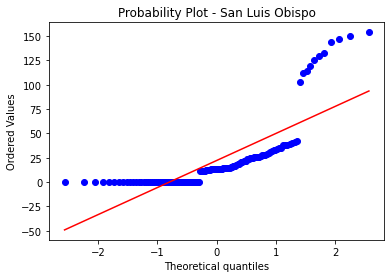

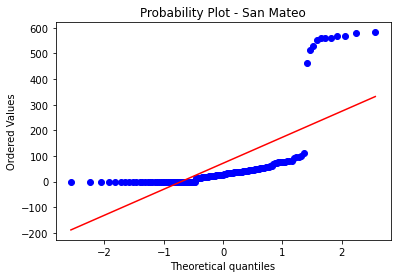

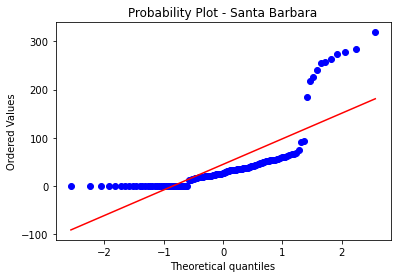

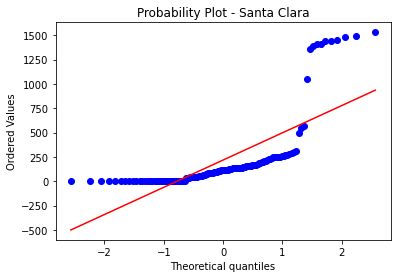

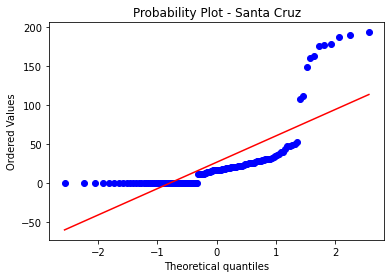

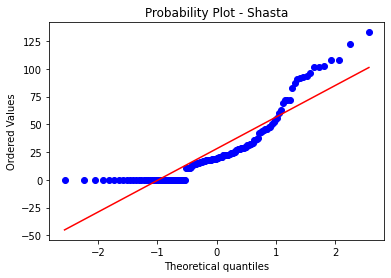

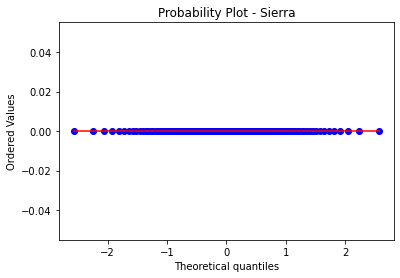

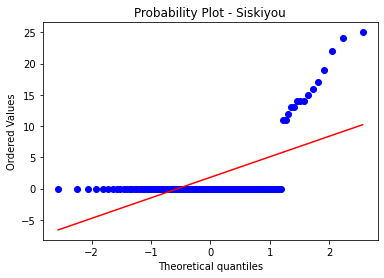

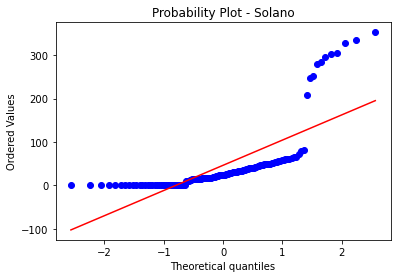

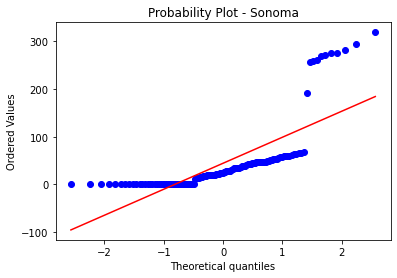

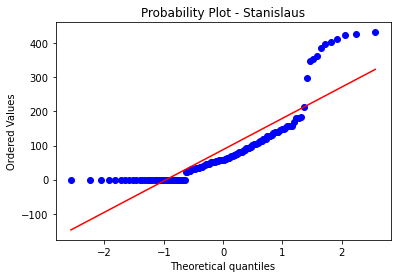

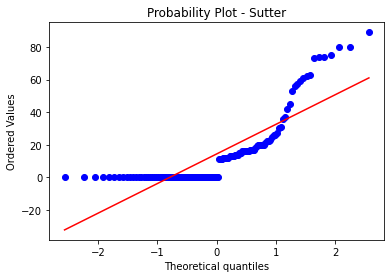

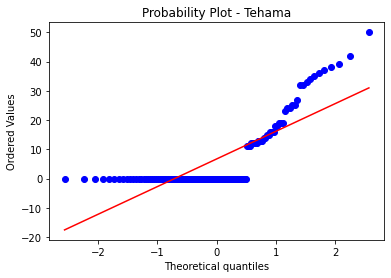

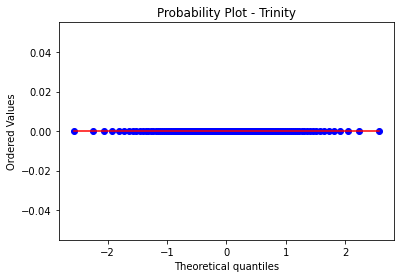

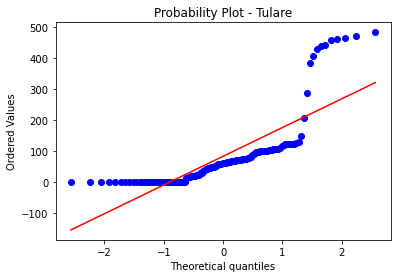

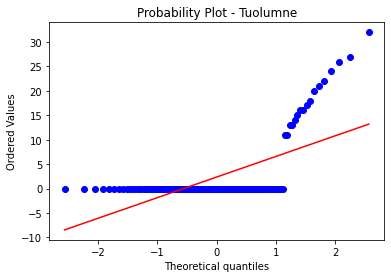

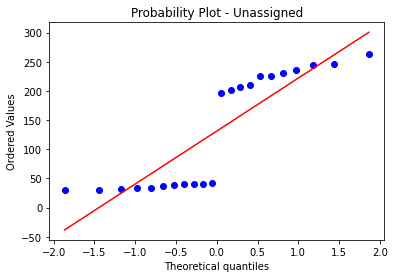

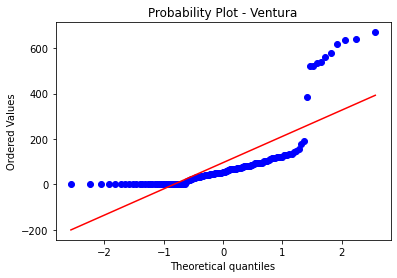

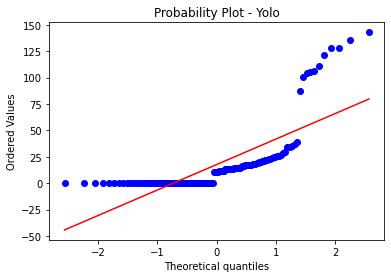

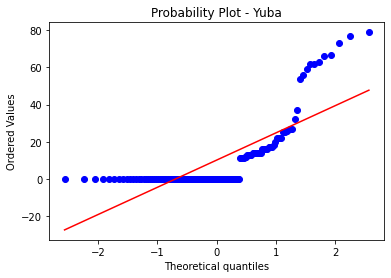

In [131]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_counties = sample_df['County'].unique()
for i in unique_counties:
    stats.probplot(sample_df[sample_df['County'] == i]['Count_ICD9'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  i)
    plt.show()

#### Null Hypothesis:
     Ho: μ₁= μ₂ = μ₃ = … = μ₆

#### Alternative Hypothesis:
     H1: Not all salary means are equal

In [132]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

In [133]:
# calculate SSTR and update anova table
x_bar = sample_df['Count_ICD9'].mean()
SSTR = sample_df.groupby('County').count() * (sample_df.groupby('County').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Count_ICD9'].sum()

In [134]:
# calculate SSE and update anova table
SSE = (sample_df.groupby('County').count() - 1) * sample_df.groupby('County').std()**2
anova_table['SS']['Within Groups'] = SSE['Count_ICD9'].sum()

In [135]:
# calculate SSTR and update anova table
SSTR = SSTR['Count_ICD9'].sum() + SSE['Count_ICD9'].sum()
anova_table['SS']['Total'] = SSTR

In [136]:
# update degree of freedom
anova_table['df']['Between Groups'] = sample_df['County'].nunique() - 1
anova_table['df']['Within Groups'] = sample_df.shape[0] - sample_df['County'].nunique()
anova_table['df']['Total'] = sample_df.shape[0] - 1


In [137]:
#calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

In [138]:
# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

In [139]:
# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])


In [140]:
# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])


In [141]:
# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,377506386.590014,58,6508730.803276,64.622667,0.0,1.397689
Within Groups,779061516.399593,7735,100719.006645,,,
Total,1156567902.989607,7793,148411.125753,,,


In [142]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 64.62266676450486  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 64.62266676450486  and critical value is: 1.3976890773955135
Null Hypothesis is rejected.


### Conclusion
According to the conclusions drawn from the One-Way ANOVA test, with 95% confidence interval, we have enough evidence to suggest that that not all mean Count_ICD9 values are the same for all counties in California at 5% significance level as we see that the p-value is in fact less than 0.05 (the alpha value).

## PCA Test

First, find the covariance data

In [242]:
df3 = df2.copy(deep=True)

In [244]:
df3 = df3.drop(['Year'], axis=1)

In [245]:
df3_cov = df3.cov()
df3_cov

,PDI,Count_ICD9,Population_ICD9,ObsRate_ICD9,RiskAdjRate_ICD9
PDI,1329.971483,-2.223662e+03,1.062962e+05,-1.634586e+02,-1.392729e+02
Count_ICD9,-2223.662300,1.582194e+06,3.847856e+08,3.998308e+02,5.836156e+02
Population_ICD9,106296.185979,3.847856e+08,5.561497e+11,-2.884675e+06,-2.760745e+06
ObsRate_ICD9,-163.458596,3.998308e+02,-2.884675e+06,7.890973e+03,6.930820e+03
RiskAdjRate_ICD9,-139.272936,5.836156e+02,-2.760745e+06,6.930820e+03,6.921049e+03


In [246]:
df3_cov.shape

(5, 5)

In [251]:
eigenvals1, eigenvecs1 = np.linalg.eig(df3_cov)
print("Eigen Values for covariance matrix are:\n", eigenvals1)
print("\nEigen Vectors for covariance matrix are:\n", eigenvecs1)

Eigen Values for covariance matrix are:
 [5.56149932e+11 1.31598331e+06 1.43192752e+04 1.32273023e+03
 4.58097893e+02]

Eigen Vectors for covariance matrix are:
 [[ 1.91125842e-07 -1.74780643e-03 -1.59809843e-02 -9.99804638e-01
  -1.14994923e-02]
 [ 6.91875576e-04  9.99994704e-01 -2.68045522e-03 -1.70340496e-03
  -1.64228578e-04]
 [ 9.99999761e-01 -6.91852685e-04  9.03553787e-06  1.25380410e-06
   2.08220273e-07]
 [-5.18686351e-06  1.84173217e-03  7.31323869e-01 -3.84839676e-03
  -6.82017006e-01]
 [-4.96402899e-06  1.91484377e-03  6.81837827e-01 -1.93125157e-02
   7.31245881e-01]]


In [252]:
PVE = eigenvals1/eigenvals1.sum()
print("Proportion of total variance explained by principal component:\n" , PVE)
print("\nCummulative proportion of total variance explained by principal component:\n",np.cumsum(PVE)*100)


Proportion of total variance explained by principal component:
 [9.99997605e-01 2.36623270e-06 2.57470874e-08 2.37836416e-09
 8.23692981e-10]

Cummulative proportion of total variance explained by principal component:
 [ 99.99976048  99.99999711  99.99999968  99.99999992 100.        ]


In [253]:
#Sort the eigenvectors by their corresponding eigenvalues

idx = eigenvals1.argsort()[::-1]   
eigenvals = eigenvals1[idx]
eigenvecs = eigenvecs1[:,idx]
eigenvals

array([5.56149932e+11, 1.31598331e+06, 1.43192752e+04, 1.32273023e+03,
       4.58097893e+02])

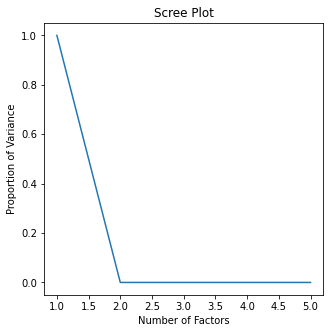

In [254]:
fig=plt.figure(figsize=(5,5))
plt.plot([1,2,3,4,5],PVE)
plt.title("Scree Plot")
plt.xlabel("Number of Factors")
plt.ylabel("Proportion of Variance")
plt.show()

The elbow occurs at 2 and since the first two components 99.69% of the sample variance.


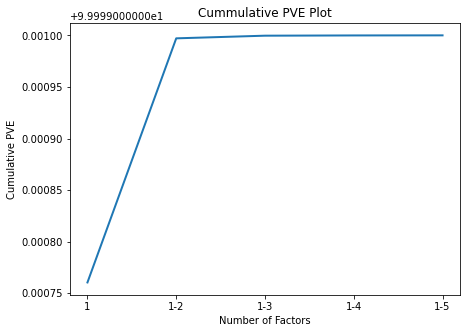

In [255]:
fig=plt.figure(figsize=(7,5))
plt.plot(["1","1-2","1-3","1-4","1-5"],np.cumsum(PVE)*100,linewidth=2)
plt.title("Cummulative PVE Plot")
plt.xlabel("Number of Factors")
plt.ylabel("Cumulative PVE")
plt.show()

In [257]:
names = ["PC-1","PC-2","PC-3","PC-4", "PC-5"]
cnames = ["PDI","Count_ICD9","Population_ICD9","ObsRate_ICD9","RiskAdjRate_ICD9"]
eigenvect = pd.DataFrame(eigenvecs1, index=cnames, columns=names)
eigenvect

,PC-1,PC-2,PC-3,PC-4,PC-5
PDI,1.911258e-07,-0.001748,-0.015981,-0.999805,-1.149949e-02
Count_ICD9,6.918756e-04,0.999995,-0.002680,-0.001703,-1.642286e-04
Population_ICD9,9.999998e-01,-0.000692,0.000009,0.000001,2.082203e-07
ObsRate_ICD9,-5.186864e-06,0.001842,0.731324,-0.003848,-6.820170e-01
RiskAdjRate_ICD9,-4.964029e-06,0.001915,0.681838,-0.019313,7.312459e-01


### Interpretation
All the five components shows some kind of contrasting relationship.

As first two components explains maximum variation (99.69%). Below are there subjective interpretation.

(1) From the first component it can be interpreted that the counties with highest Population_ICD9 (Population at risk) and highest Count_ICD9 (Count of hospitalizations with selected medical conditions) tend to have the highest PDI (categories of medical conditions) which makes sense as the most categories of medical conditions would be where the count of hospitalizations and population at risk are the highest.

(2) From the second component, it can be used to infer that as the ObsRate_ICD9 (Observed Rate reported) as well as the RiskAdjRate_ICD9 (Risk Adjusted Observed Rate reported) are higher, the Count_ICD9 (Count of hospitalizations with selected medical conditions) increases.


# Conclusion

I learned a lot with this dataset. When I found this dataset, I was really intrigued by how Hospitalizations for different medical conditions can be prevented. As I mentioned in the introduction, I had personally faced a lot of health complications and some of which could have been prevented with the right treatment plan. Here, I explored and shed light on how one of the highest preventive medical condition: Perforated Appendix (<18) avergaed greater than California. I also learned about how some counties have much higher count of hospitalizations in selected medical conditions. Finally, I learned how populations at risk in CA and higher count of hospitalizations have the most of each in different categories of medical conditions. This project also made me learn about the different medical conditions that exist and how they impact children since this dataset is about people aged 1-17 years old. Ranging from Low Birth Weight to Diabetes Short-term Complications (Age 6-17), I had no idea that these were preventable medical conditions. 

#### Limitations
Altough this dataset was a great start to explore data within CA and within the age range of (1-17) I did face a lot of limitations. Primarily, the years listed were only between 2005-20015 which I feel like wasn't that accurate to today. The data that was there since 2016 was not even 25% of the entire dataset so it was unusable. I also thought this dataset helped understand the statistics behind the medical conditions but did not explore the factors or causes behind it and lacked many categorical columns I would have liked to explore (eg: gender, predisposed medical condition, avg household income, etc.)


#### Future Work
Even though I learned a lot and explored many factors including the count and population risk, there is so much more I want to learn. I realized I am really passionate about this topic and want to continue my exploration within this area. More specifically, I want to learn: 
1. Are there specific counties that have the most of a particular medical condition? If so, which ones and what are they?
2. What are factors that can help improve the statistics and actually in fact prevent hospitalizations?

# References

(1) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7599446/ <br>
(2) https://towardsdatascience.com/anova-test-with-python-cfbf4013328b <br>
(3) https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce <br>
(4) https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html  <br>
(5) https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
